/home/klinetry/Desktop/analytix-master/tools/src/PlotH5/Plotterator.py:259: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use(os.path.join(RELATIVE_LIB_PATH,'gobat',os.path.basename(self.fig['stylesheet'])))
/home/klinetry/Desktop/analytix-master/tools/src/PlotH5/Plotterator.py:404: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  plt.style.use(os.path.join(RELATIVE_LIB_PATH,'gobat',os.path.basename(self.fig['stylesheet'])))
/home/klinetry/Desktop/analytix-master/tools/src/PlotH5/Plotterator.py:671: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


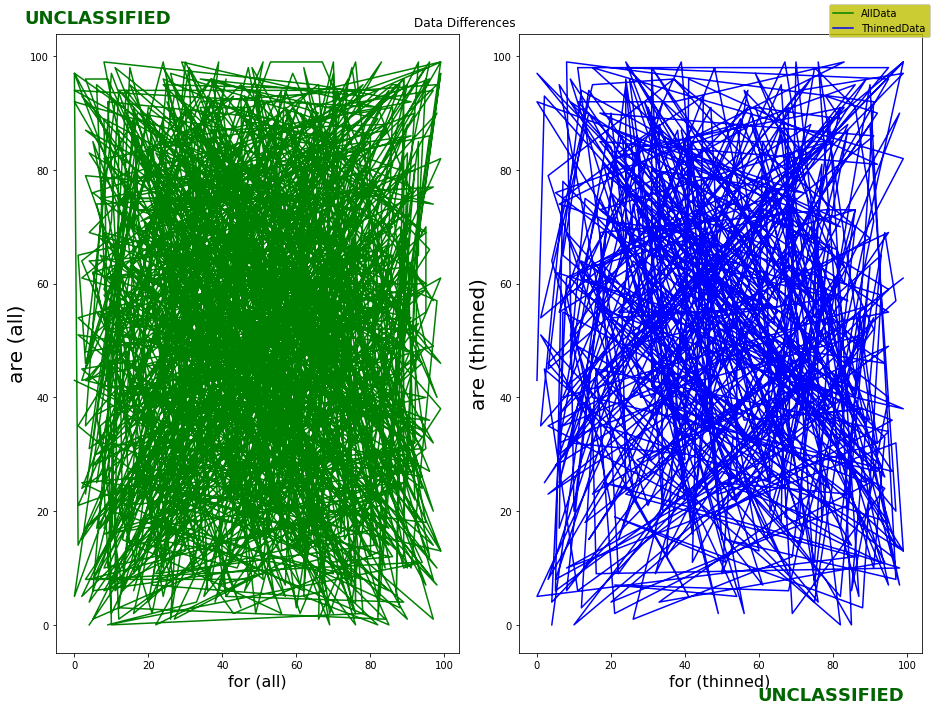

In [18]:
#Some standard imports that are installed via conda or that are part of python standard library
import os
import sys
import numpy as np
import h5py

#NOTE:
#You need set the below variable to the Repo tools/src directory
#NOTE:
path_to_src = os.path.join(os.path.expanduser('~'),'Desktop','analytix-master','tools','src')
#This appends the src path to sys.path.  It is needed to do relative imports from our Repo
sys.path.append(path_to_src)
#Importing a couple of files from our repo
#Plotterator is our Matplotlib wrapper class
import PlotH5.Plotterator as PR
#PhobosFunctions is a file that has various functions for reading H5 files in the way we format them
import utils.PhobosFunctions as PF

#Lets create an H5 file

#First lets make a path to place it somewhere.  This will put it on your Desktop
path_to_h5 = os.path.join(os.path.expanduser('~'),'Desktop','MyH5.h5')

#Want to use a 'with' statement so that the h5 file closes after we are done with it
with h5py.File(path_to_h5,'w') as hf:
    group = hf.create_group('Group')
    dataGroup = group.create_group('MyDataSet')
    #Create some random data to put in our h5.  We will put it in a dictionary
    #The list below will be our headers for the data
    headers = ['These','are','the','headers','for','data']
    #This is the dictionary we will put our data in
    data_dict = {}
    for header in headers:
        data_dict[header] = np.random.randint(0,100,1000)
    #The data_dict was created with 1000 random integers ranging from 0-100
    
    #Now lets stuff it into the h5 file... This could have obviously been done in the above for loop,
    #however, for the sake of demonstration it will be done here.
    
    for key in data_dict:
        dset = dataGroup.create_dataset(key,data=data_dict[key])

#Now lets use PhobosFunctions to inspect the H5 file

#Get a list of the groups that are inside the h5
grps = PF.get_groups(path_to_h5)

#Now lets get a list of the (what we call) datasets in the h5 Group - 'Group'
dsets = PF.get_dsets(path_to_h5,'Group')
#or conversely this can be done with
dsets = PF.get_dsets(path_to_h5,grps[0])

#Now lets get the headers of the dataset in the dataset 'MyDataSet'
headers = PF.get_headers(path_to_h5,grps[0],dsets[0])

#Notice, this lets you inspect elements of the file without grabbing all of the data.  At work,
#it is set up to go even faster and these lists can be used to pair down the data that you actually
#want to extract.

#Now we will grab all of the data from the h5 file.  This will return the data in a Pandas DataFrame,
#which is the best way to look at and manipulate data IMO.

AllData = PF.get_h5_data(path_to_h5,grps[0],dsets[0])

#We can also grab specific headers only
SpecificData = PF.get_h5_data(path_to_h5,grps[0],dsets[0],headers=['These','Data'])

#We can also trim down the data by thinning it out.  This is incredibly useful if the data is very
#high fidelity and we are looking to plot it.  Matplotlib is notoriously slow for large datasets,
#and sometimes you can get away with showing 50% or less data and not losing the overall 'story?'
#the data is telling you.

#Grabbing 50% of all the data
ThinnedData = PF.get_h5_data(path_to_h5,grps[0],dsets[0],gatherpct=50)

#Kitti, now lets plot it with Plotterator

#Instantiate a Plotter class.  We commonly call this pltr.  We will give it a title and classification
pltr = PR.Plotter(title='Data Differences',classy='UNCLASSIFIED',figsize=[13,10])

#Add 2 subplots to the figure that we are going to create.  One will be for AllData, the other will be for 
#ThinnedData.  Think of these subplots as being placed in a grid.  We will place 'alldata' in the (0,0)
#position.  And we can put 'thinneddata' in the (0,1) position, which will be to the right of 'alldata'

alldata = pltr.add_subplot((0,0))
thinneddata = pltr.add_subplot((0,1))

#now lets make the plots.  We will plot the headers 'are' vs 'for' in these two plots to see the difference.

pltr.plot(AllData['for'],AllData['are'],axid=alldata,color='g',label='AllData')
pltr.plot(ThinnedData['for'],ThinnedData['are'],axid=thinneddata,color='b',label='ThinnedData')


#Now, let's trick this bitch out with some x and y labels for each sub plot.
#Each parseCommand call takes an axid (or the word 'fig' for the figure), then the matplotlib command you want to do, and finally the arguments.
#It should be noted that the arguments are wrapped in a list.  The args are then wrapped in another list, while
#kwargs are created by using a dictionary...  I'll try to show some of this.

pltr.parseCommand(alldata,'set_xlabel',[['for (all)'],dict(fontsize=16)])
pltr.parseCommand(thinneddata,'set_xlabel',[['for (thinned)'],dict(fontsize=16)])
pltr.parseCommand(alldata,'set_ylabel',[['are (all)'],dict(fontsize=20)])
pltr.parseCommand(thinneddata,'set_ylabel',[['are (thinned)'],dict(fontsize=20)])

#Now we can make a legend, which some fancyness.
pltr.parseCommand('fig','legend',[dict(facecolor='y')])

#Now we can create the plot
#The first argument is the filename that you want to save the plot to.... however, we're just into showing it
#at this point.
pltr.createPlot('',PERSIST=True)

#Feel free to mess around with all this stuff.  Try making your own h5 file with strings and floats... You can
#Look at some of the other Jupyter Notebooks to get a feel for some of that if need be.
